In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib
matplotlib.rc("font", family= 'Noto Sans CJK JP')


In [2]:
mem=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/members_completed.csv")
mem.head()

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구
1,18792000,정상회원,남,83,연결앱결제,기혼,False,강원도,강릉시
2,18942336,정상회원,여,39,신한은행,기혼,False,인천광역시,중구
3,18949760,정상회원,여,73,기업은행,기혼,NaN,강원도,홍천군
4,19391488,정상회원,여,52,연결앱결제,기혼,False,대전광역시,중구


In [3]:
prd=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/products_completed.csv")
mem.head()

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구
1,18792000,정상회원,남,83,연결앱결제,기혼,False,강원도,강릉시
2,18942336,정상회원,여,39,신한은행,기혼,False,인천광역시,중구
3,18949760,정상회원,여,73,기업은행,기혼,NaN,강원도,홍천군
4,19391488,정상회원,여,52,연결앱결제,기혼,False,대전광역시,중구


In [4]:
sales=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/Sales.csv")
mem.head()

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지
0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구
1,18792000,정상회원,남,83,연결앱결제,기혼,False,강원도,강릉시
2,18942336,정상회원,여,39,신한은행,기혼,False,인천광역시,중구
3,18949760,정상회원,여,73,기업은행,기혼,NaN,강원도,홍천군
4,19391488,정상회원,여,52,연결앱결제,기혼,False,대전광역시,중구


In [5]:
mem.loc[mem['주소지'].isna(),'주소지'] = '경기도'
mem.loc[mem['주소지'].eq('경기도') & mem['세부주소지'].isna()]

,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지


> 세부 주소지는 경기도의 최빈값인 ('수원시') 처리

In [6]:
mem.loc[mem['주소지'].eq('경기도') & mem['세부주소지'].isna(), '세부주소지'] = '수원시'

> 세부주소지 결측 6개의 주소지는 세종특별자치시, 따라서 세종특별자치시 최빈값인 ('조치원읍')처리

In [7]:
mem.loc[mem['주소지'].eq('세종특별자치시') & mem['세부주소지'].isna(), '세부주소지'] = '조치원읍'

In [8]:
sales.head()

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호,월,일,요일
0,1032097472,정상회원,1.0,7083,2021-01-02,NaN,NaN,0,0,1,13:00:00,100021783V2_1337,1,2,Saturday
1,1032097472,정상회원,1.0,29865,2021-01-02,2021-01-02,2021-01-02,0,0,0,13:00:00,100022137V2_1606,1,2,Saturday
2,1032097472,정상회원,1.0,23164,2021-01-02,2021-01-02,2021-01-03,0,0,0,13:00:00,100021452V2_1113,1,2,Saturday
3,369152832,정상회원,1.0,16655,2021-01-02,2021-01-02,2021-01-03,0,0,0,13:00:00,10002931V2_708,1,2,Saturday
4,1032097472,정상회원,1.0,8423,2021-01-02,NaN,NaN,0,0,1,13:00:00,100022085V2_1559,1,2,Saturday


> 경기(14), 강원(1), 서울(2), 광주(3) 전부 경기도, 강원도, 서울특별시, 광주광역시로 통일

In [9]:
mem['주소지'] = mem['주소지'].replace('경기','경기도')
mem['주소지'] = mem['주소지'].replace('광주','광주광역시')
mem['주소지'] = mem['주소지'].replace('서울','서울특별시')
mem['주소지'] = mem['주소지'].replace('강원','강원도')

In [10]:
mem['주소지'].value_counts()

경기도        2299
서울특별시      1479
부산광역시      1396
경상남도       1305
경상북도        801
대구광역시       654
강원도         597
충청남도        575
충청북도        527
인천광역시       523
전라북도        488
대전광역시       488
울산광역시       419
광주광역시       392
전라남도        360
제주특별자치도     126
세종특별자치시     111
Name: 주소지, dtype: int64

In [11]:
sales['요일'].value_counts()

Friday       119280
Saturday     100878
Tuesday      100388
Monday        97560
Sunday        96471
Wednesday     95691
Thursday      52427
Name: 요일, dtype: int64

In [13]:
sales['배송시작일'] = pd.to_datetime(sales['배송시작일'])
sales['배송완료일'] = pd.to_datetime(sales['배송완료일'])
sales['주문일시'] = pd.to_datetime(sales['주문일시'])

In [14]:
sales['배송기간']=sales['배송완료일'] - sales['배송시작일']

In [15]:
sales['주문_도착']=sales['배송완료일'] - sales['주문일시']

In [16]:
sales['주문_배송']=sales['배송시작일'] - sales['주문일시']

In [17]:
sales['배송기간'].value_counts()

0 days    294009
1 days    241832
2 days     96403
Name: 배송기간, dtype: int64

In [18]:
sales['주문_도착'].value_counts()


1 days    240778
0 days    230052
2 days    130126
3 days     27207
4 days      4081
Name: 주문_도착, dtype: int64

In [19]:
prd.shape

(2549, 6)

In [20]:
sales.shape

(662695, 18)

In [21]:
df=pd.merge(sales,prd ,on="제품번호", how="left")

In [22]:
df=pd.merge(df,mem ,on="회원번호", how="left")

In [23]:
df.head()

,회원번호,회원상태_x,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,...,상품중량,물품분류,회원상태_y,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지
0,1032097472,정상회원,1.0,7083,2021-01-02,NaT,NaT,0,0,1,...,10알,고기/계란,정상회원,여,39,우리은행,기혼,NaN,경기도,화성시
1,1032097472,정상회원,1.0,29865,2021-01-02,2021-01-02,2021-01-02,0,0,0,...,2kg,곡물,정상회원,여,39,우리은행,기혼,NaN,경기도,화성시
2,1032097472,정상회원,1.0,23164,2021-01-02,2021-01-02,2021-01-03,0,0,0,...,500g,고기/계란,정상회원,여,39,우리은행,기혼,NaN,경기도,화성시
3,369152832,정상회원,1.0,16655,2021-01-02,2021-01-02,2021-01-03,0,0,0,...,300g,해산물,정상회원,여,40,농협중앙회,기혼,False,울산광역시,남구
4,1032097472,정상회원,1.0,8423,2021-01-02,NaT,NaT,0,0,1,...,150g,채소,정상회원,여,39,우리은행,기혼,NaN,경기도,화성시


In [24]:
df.groupby('물품분류')['배송기간'].value_counts().unstack().sort_values(by="2 days",ascending=False)

배송기간,0 days,1 days,2 days
물품분류,,,
채소,70017,57488,22803
가공식품/간편식,51425,42681,16966
고기/계란,43354,35760,14401
간식,29751,24449,9775
해산물,20301,16877,6693
음료/주류,14528,11758,4601
과일,13374,10921,4350
곡물,10249,8631,3431
유제품,10372,8391,3383


In [25]:
grouped = df.groupby('주소지')['주문_배송'].value_counts().unstack()

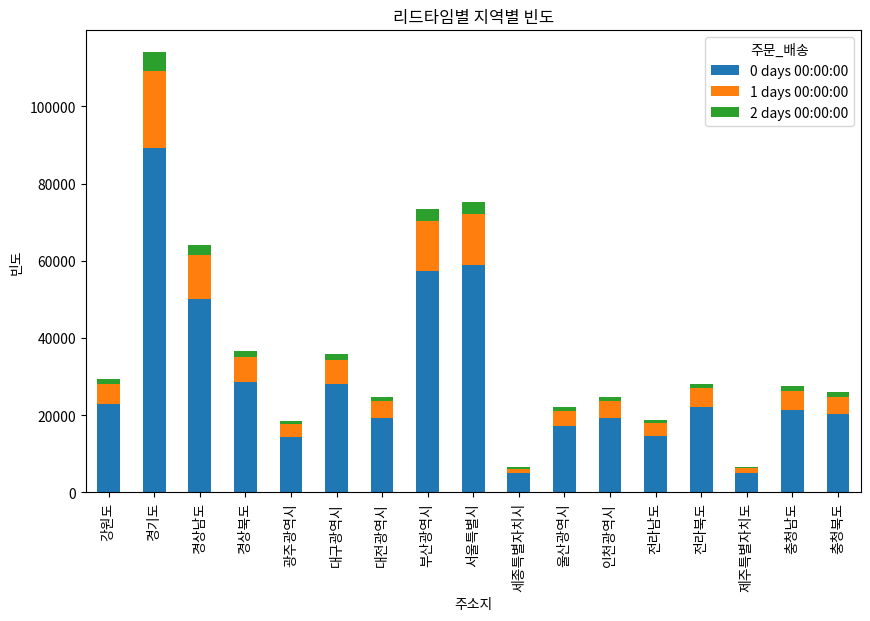

In [26]:
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('리드타임별 지역별 빈도')
plt.xlabel('주소지')
plt.ylabel('빈도')
plt.legend(title='주문_배송')

plt.show()